In [46]:
import csv
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt

In [47]:
d2020 = []
with open('deaths2020.csv', 'r') as f:
    r = csv.reader(f)
    for row in r:
        if row[0]=='Name': continue
        name = row[0]
        birth = date.fromisoformat(row[1])
        death = date.fromisoformat(row[2])
        covid = (row[3] == 'True')
        created = date.fromisoformat(row[4])
        if death < date(2020,1,1):
            print ("Oops {} death {}".format(name, death))
            continue
        d2020.append([name,birth,death,covid,created])

Oops Krishna Bose death 2004-05-16
Oops Harry G. Haskell Jr. death 1959-01-03
Oops Nur Hassan Hussein death 2008-12-24
Oops William John McNaughton death 2002-04-25
Oops Andrea Mugione death 2016-02-18
Oops Ng Jui Ping death 1995-07-01
Oops Beni Prasad Verma death 2014-05-26
Oops Clifford Wiens death 2006-01-15
Oops Alfred Worden death 1978-12-31


In [65]:
dd2020 = [row for row in d2020 if row[4] < date(2019,1,1)]

In [49]:
dates = [date(2020,1,1)+timedelta(days=j) for j in range((date(2020,4,20)-date(2020,1,1)).days)]

In [50]:
count_all = [0]*len(dates)
count_cvd = [0]*len(dates)
count_base = [0]*len(dates)

In [51]:
for row in dd2020:
    j=(row[2]-date(2020,1,1)).days
    count_all[j] += 1
    if row[3]:
        count_cvd[j] += 1
    else:
        count_base[j] += 1

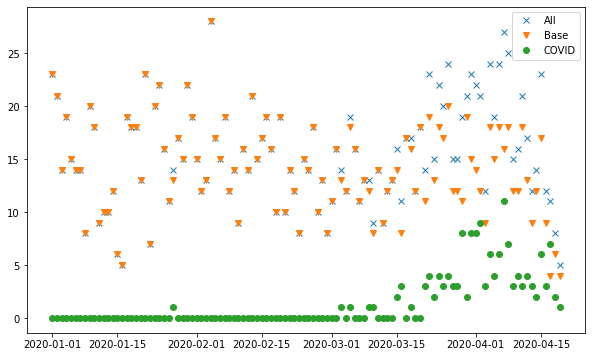

In [57]:
plt.figure(figsize=(10,6))
plt.plot_date(dates, count_all, 'x')
plt.plot_date(dates, count_base, 'v')
plt.plot_date(dates, count_cvd, 'o')
plt.legend(['All', 'Base', 'COVID'])

In [66]:
ages = [(row[2] - row[1])/timedelta(days=365.25) for row in dd2020]
ages_cvd = [(row[2] - row[1])/timedelta(days=365.25) for row in dd2020 if row[3]]

(array([ 0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  2.,  0.,  2.,  7.,  8.,
        11., 18., 21., 29., 24., 15.,  6.,  0.,  1.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110.]),
 <a list of 22 Patch objects>)

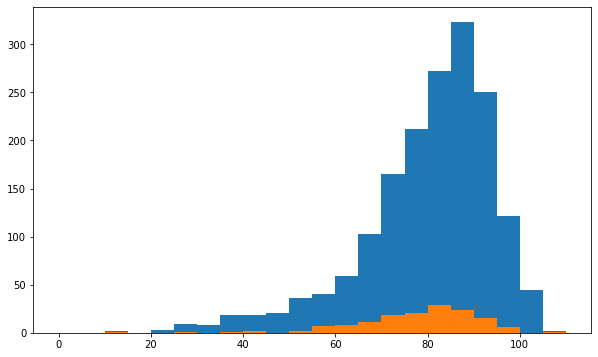

In [74]:
plt.figure(figsize=(10,6))
plt.hist(ages, bins=22, range=(0,110))
plt.hist(ages_cvd, bins=22, range=(0,110))

In [64]:
dd2020